In [1]:
# dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# read CSV file 
file_to_load = "clean_sharks.csv"
victim_df = pd.read_csv(file_to_load)
victim_df.head()

,Attack Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,6/25/2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,6/18/2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,NaN
2,6/9/2018,2018,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,6/8/2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,2 m shark
4,6/4/2018,2018,Provoked,MEXICO,Colima,La Ticla,Diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


In [3]:
#clean up Type column
victim_df.loc[victim_df['Type'].str.contains('Boating', na =False,case=False), 'Type'] = 'Unknown'
victim_df.loc[victim_df['Type'].str.contains('Sea Disaster', na =False,case=False), 'Type'] = 'Unknown'
victim_df['Type'].value_counts()

Unprovoked    2499
Unknown        459
Provoked       232
Name: Type, dtype: int64

"Boating" and "Sea Disaster" recategorized as "unknown" 

In [4]:
#clean up Fatal column
victim_df.loc[victim_df['Fatal (Y/N)'].str.contains('M', na =False,case=False), 'Fatal (Y/N)'] = 'Unknown'
victim_df.loc[victim_df['Fatal (Y/N)'].str.contains('2017', na =False,case=False), 'Fatal (Y/N)'] = 'Unknown'
victim_df.loc[victim_df['Fatal (Y/N)'].str.contains('UNKNOWN', na =False,case=False), 'Fatal (Y/N)'] = 'Unknown'
victim_df['Fatal (Y/N)'].value_counts()

N          2595
Y           329
Unknown      22
Name: Fatal (Y/N), dtype: int64

"2017" and "M" recategorized as "unknown

In [5]:
#view Age column
victim_df["Age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '� ', ' ', '30 or 36', '6�', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26'], dtype=object)

In [6]:
#clean injury column
victim_df.loc[victim_df['Injury'].str.contains('Severed', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('Fatal', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('Fracture', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('scaveng', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('death', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('serious', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('severe', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('disappear', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('decapitated', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('corpse', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('post-mortem', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('recovered from', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('missing', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('drown', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('swept out to sea', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('found', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('removed', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('remains', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('broken ribs', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('killed', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('lost', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('amputat', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('recovered', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('taken', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('massive', na =False,case=False), 'Injury'] = 'Severe'
victim_df.loc[victim_df['Injury'].str.contains('cracked', na =False,case=False), 'Injury'] = 'Severe'

victim_df.loc[victim_df['Injury'].str.contains('Minor', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('puncture', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('superfic', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('lacerat', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('nipped', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('bitten', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('cuts', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('abraded', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('injur', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('wound', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('bit', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('cut', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('torn', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('abrasion', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('bruised', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('survived', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('bumped', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('pull', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('gash', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('bruise', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('grab', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('struck', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('avulsion', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('nip', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('graze', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('avulsed', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('scratch', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('scrape', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('thigh', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('toothmarks', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('heel', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('pinch', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('tooth mark', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('ankle', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('contusion', na =False,case=False), 'Injury'] = 'Minor to Moderate'
victim_df.loc[victim_df['Injury'].str.contains('provoked', na =False,case=False), 'Injury'] = 'Minor to Moderate'

victim_df.loc[victim_df['Injury'].str.contains('doubtful', na =False,case=False), 'Injury'] = 'None'
victim_df.loc[victim_df['Injury'].str.contains('unconfirmed', na =False,case=False), 'Injury'] = 'None'
victim_df.loc[victim_df['Injury'].str.contains('boat', na =False,case=False), 'Injury'] = 'None'
victim_df.loc[victim_df['Injury'].str.contains('rammed', na =False,case=False), 'Injury'] = 'None'
victim_df.loc[victim_df['Injury'].str.contains('hoax', na =False,case=False), 'Injury'] = 'None'
victim_df.loc[victim_df['Injury'].str.contains('board', na =False,case=False), 'Injury'] = 'None'
victim_df.loc[victim_df['Injury'].str.contains('media', na =False,case=False), 'Injury'] = 'None'

victim_df.loc[victim_df['Injury'].str.contains('press', na =False,case=False), 'Injury'] = 'Not Answered'
victim_df.loc[victim_df['Injury'].str.contains('no details', na =False,case=False), 'Injury'] = 'Not Answered'
victim_df.loc[victim_df['Injury'].str.contains('not', na =False,case=False), 'Injury'] = 'Not Answered'

victim_df["Injury"].value_counts()

Minor to Moderate    2527
Severe                622
Not Answered           23
None                   14
Name: Injury, dtype: int64

Grouped injuries into 3 groups: None, Severe, and Minor to Moderate. Severe is defined as broken bones, missing limbs, loss of life. Mild to Moderate is all other injuries. None is no injuries reported, spectulation, or media involvement without facts. 

In [7]:
#clean up Sex Column
victim_df.loc[victim_df['Sex '].str.contains('lli', na =False,case=False), 'Sex '] = 'Unknown'
victim_df.loc[victim_df['Sex '].str.contains('M ', na =False,case=False), 'Sex '] = 'M'
victim_df['Sex '].value_counts()

M          2513
F           466
Unknown       1
Name: Sex , dtype: int64

Changed "lli" to unknown. Defination of lli in relation to gender was unable to be found through multiple searches. 

In [8]:
# clean up Activity Column
victim_df.loc[victim_df['Activity'].str.contains('Float', na =False,case=False), 'Activity'] = 'Swimming'
victim_df.loc[victim_df['Activity'].str.contains('Snork', na =False,case=False), 'Activity'] = 'Swimming'
victim_df.loc[victim_df['Activity'].str.contains('tread', na =False,case=False), 'Activity'] = 'Swimming'
victim_df.loc[victim_df['Activity'].str.contains('waist', na =False,case=False), 'Activity'] = 'Swimming'

victim_df.loc[victim_df['Activity'].str.contains('Dive', na =False,case=False), 'Activity'] = 'Diving'

victim_df.loc[victim_df['Activity'].str.contains('sup', na =False,case=False), 'Activity'] = 'Boarding (Boogie, Paddle, Body, SUP)'
victim_df.loc[victim_df['Activity'].str.contains('paddl', na =False,case=False), 'Activity'] = 'Boarding (Boogie, Paddle, Body, SUP)'

victim_df.loc[victim_df['Activity'].str.contains('Kayak', na =False,case=False), 'Activity'] = 'Kayaking'

victim_df.loc[victim_df['Activity'].str.contains('Ski', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('Boat', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'

victim_df.loc[victim_df['Activity'].str.contains('Row', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('sail', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('cruise', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('dinghy', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('canoe', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'

victim_df.loc[victim_df['Activity'].str.contains('rac', na =False,case=False), 'Activity'] = 'Competition'
victim_df.loc[victim_df['Activity'].str.contains('compet', na =False,case=False), 'Activity'] = 'Competition'

victim_df.loc[victim_df['Activity'].str.contains('Rescue', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('Feeding', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('Free', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('Play', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('jump', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('film', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('research', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('anchor', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('drill', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('fell', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('retri', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('fix', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('rescuing', na =False,case=False), 'Activity'] = 'Accident'

victim_df.loc[victim_df['Activity'].str.contains('Disaster', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('tsunami', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('capsi', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('plung', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('adrift', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('murder', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('sank', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('passenger', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('sink', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('run down', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('aircraft', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('wreck', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('foundering', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('illegal', na =False,case=False), 'Activity'] = 'Disaster'

victim_df.loc[victim_df['Activity'].str.contains('pet', na =False,case=False), 'Activity'] = 'Interacting with Shark'
victim_df.loc[victim_df['Activity'].str.contains('Rescue', na =False,case=False), 'Activity'] = 'Interacting with Shark'
victim_df.loc[victim_df['Activity'].str.contains('shark', na =False,case=False), 'Activity'] = 'Interacting with Shark'
victim_df.loc[victim_df['Activity'].str.contains('NSB', na =False,case=False), 'Activity'] = 'Interacting with Shark'

victim_df.loc[victim_df['Activity'].str.contains('crab', na =False,case=False), 'Activity'] = 'Fishing (fish, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('shrimp', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('sardines', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('lobster', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('bichiques', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('catch', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('casting', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('fishing', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'

victim_df.loc[victim_df['Activity'].str.contains('stand', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('walk', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('stam', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('wash', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('collect', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('wading', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('bath', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('sit', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('crouch', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('crawl', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('hiking', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('watch', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('exercis', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('splash', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('photo', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('prone', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('kneel', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'

victim_df.loc[victim_df['Activity'].str.contains('Kakaying', na =False,case=False), 'Activity'] = 'Kayaking'

victim_df.loc[victim_df['Activity'].str.contains('batin', na =False,case=False), 'Activity'] = 'Unknown'
victim_df.loc[victim_df['Activity'].str.contains('cruising', na =False,case=False), 'Activity'] = 'Unknown'

activity_df=pd.DataFrame(victim_df['Activity'].value_counts())
activity_df=activity_df.rename(columns={"Activity":"Count"})
activity_df

,Count
Surfing,1104
Swimming,577
"Fishing (fish, shrimp, lobster, crabs)",524
Diving,224
"On Shore (wading, walking, sitting)",201
"Boarding (Boogie, Paddle, Body, SUP)",164
Unknown,54
Accident,48
"Boating (canoe, cruise, row)",46
Disaster,41


All activities grouped together by main intention. Accidents relates to unintential accidents while disasters relate to weather, wrecks, and human intent to cause harm. Batin and Cruising are grouped in Unknown as these have many definations and context is unknown. 

In [9]:
victim_df

,Attack Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,6/25/2018,2018,Unknown,USA,California,"Oceanside, San Diego County","Boarding (Boogie, Paddle, Body, SUP)",F,57,Minor to Moderate,N,White shark
1,6/18/2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County","On Shore (wading, walking, sitting)",F,11,Minor to Moderate,N,NaN
2,6/9/2018,2018,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Minor to Moderate,N,NaN
3,6/8/2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor to Moderate,N,2 m shark
4,6/4/2018,2018,Provoked,MEXICO,Colima,La Ticla,Diving,M,NaN,Minor to Moderate,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2/10/1975,1975,Unprovoked,AUSTRALIA,South Australia,(Point Sinclair) Penong,Swimming,M,12,Severe,Y,"White shark, 3 m [10']"
3188,2/9/1975,1975,Unprovoked,AUSTRALIA,Victoria,Anglesea,"Fishing (fish, shrimp, lobster, crabs)",M,45,Minor to Moderate,N,"Carpet shark, 10'"
3189,2/7/1975,1975,Unprovoked,AUSTRALIA,Queensland,Currumbin Rock,NaN,M,NaN,Minor to Moderate,N,NaN
3190,2/1/1975,1975,Provoked,SOUTH AFRICA,Western Cape Province,"Beespens, False Bay","Fishing (fish, shrimp, lobster, crabs)",M,12,Minor to Moderate,N,"Copper shark, 50-kg [110-b]"


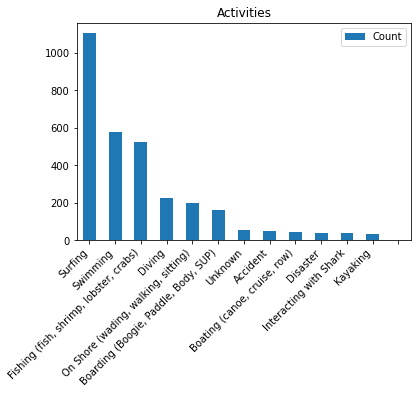

In [10]:
# Bar chart by activity
#activity_df = pd.DataFrame({'Activity':[victim_df['Activity']], 'Count':[activity_df]})
ax = activity_df.plot.bar()
plt.xticks(rotation=45, ha='right')
plt.title("Activities")
plt.savefig('Activities.png',bbox_inches='tight')

In [11]:
#pie chart by gender
gender_df=pd.DataFrame(victim_df['Sex '].value_counts().reset_index())
gender_df=gender_df.rename(columns={"Sex ":"Count", 'index':"Sex"})
gender = gender_df[["Sex"]]
                    
gender_df

,Sex,Count
0,M,2513
1,F,466
2,Unknown,1


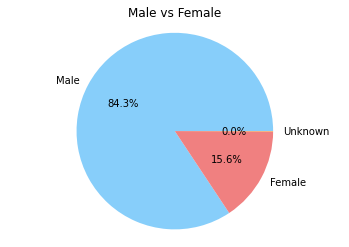

In [12]:
# pie chart by gender 
y = gender_df['Count']
mylabels = ["Male", "Female", "Unknown"]
colors = ["lightskyblue", "lightcoral", "yellow"]

plt.pie(y, labels = mylabels, colors=colors, autopct="%1.1f%%")
plt.title("Male vs Female")
plt.axis("equal")
plt.savefig('Male_vs_Female.png')

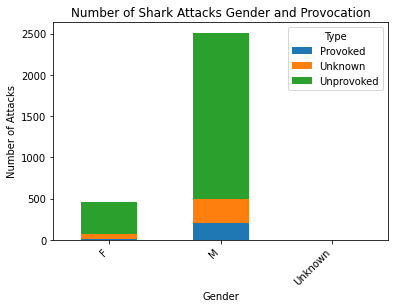

In [32]:
# stacked bar graph: gender vs provoked/not provoked 
gender = victim_df[['Type', 'Sex ']].copy()
gender_df=pd.DataFrame(gender.value_counts().reset_index())
gender_df.rename(columns={gender_df.columns[2]:"Count"}, inplace=True)
counts=gender_df.value_counts()

gender_stack=counts.to_frame().reset_index()
#gender_stack.rename(columns={'0':'Count'})
#gender_stack = gender_stack['Count'!=1]
gender_df = gender_df.pivot(index='Sex ', columns='Type', values='Count')
gender_df.plot.bar(stacked=True)
plt.title("Shark Attacks: Gender vs Provocation")
plt.ylabel("Number of Attacks")
plt.xlabel("Gender")
plt.xticks(rotation = 45, ha="right")
plt.savefig('Gender_vs_Provoked.png',bbox_inches='tight')

In [37]:
# stacked bar graph: Injury vs provoked/Not provoked 
injury_stack = victim_df[['Type', 'Fatal (Y/N)']].copy()
injury_stack_df=pd.DataFrame(injury_stack.value_counts().reset_index())
injury_stack_df.rename(columns={injury_stack_df.columns[2]:"Count"}, inplace=True)

#counts=injury_stack_df.value_counts()

injury_stack_df 


,Type,Fatal (Y/N),Count
0,Unprovoked,N,2186
1,Unprovoked,Y,290
2,Provoked,N,225
3,Unknown,N,183
4,Unknown,Y,35
5,Unprovoked,Unknown,20
6,Provoked,Y,4
7,Provoked,Unknown,2


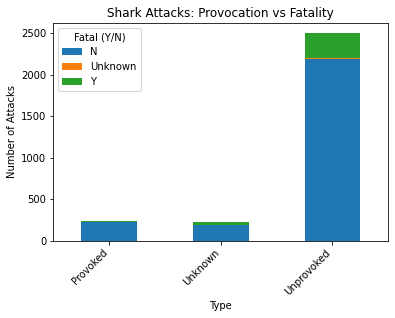

In [42]:
#injury_stack_df=counts.to_frame().reset_index()
injury_stack_df = injury_stack_df.pivot(index='Type', columns='Fatal (Y/N)', values='Count')
injury_stack_df.plot.bar(stacked=True)
plt.title("Shark Attacks: Provocation vs Fatality")
plt.ylabel("Number of Attacks")
plt.xticks(rotation = 45, ha="right")
plt.savefig('Fatality_vs_Provoked.png',bbox_inches='tight')

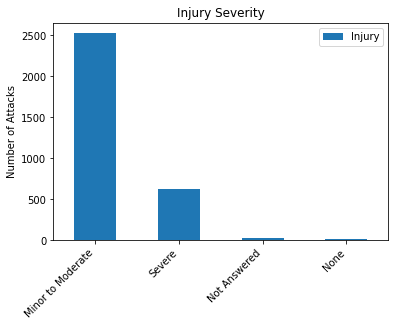

In [41]:
#Bar graph: Injury severity
injury_df=pd.DataFrame(victim_df['Injury'].value_counts())
ax = injury_df.plot.bar()
plt.xticks(rotation=45, ha='right')
plt.title("Injury Severity")
plt.ylabel("Number of Attacks")
plt.savefig('Injury.png',bbox_inches='tight')

In [ ]:
# pie graph: age groups by fatality 
